## Ingest data

In [199]:
# Import packages
import os
import pandas as pd

# Set directory
filepath = '/Users/mymac/Downloads/'
# filepath = 'C:/Users/tomwe/Documents/GoogleTrendsData/'
data_folder = os.path.expanduser(filepath)

# Read the list of files in the specified folder
files = os.listdir(data_folder)

# Extract "multiTimeline" files
google_trends_files = [file for file in files if file[0:13] == 'multiTimeline']

# Identify the most recent date
most_recent_file = max(google_trends_files)

# Load data
df = pd.read_csv(filepath + most_recent_file, skiprows=2)
print(df)

       Month  python machine learning: (United States)  \
0    2013-07                                         6   
1    2013-08                                        10   
2    2013-09                                         7   
3    2013-10                                        13   
4    2013-11                                        10   
..       ...                                       ...   
115  2023-02                                        97   
116  2023-03                                        80   
117  2023-04                                        77   
118  2023-05                                        75   
119  2023-06                                        77   

     r machine learning: (United States)  
0                                      5  
1                                      6  
2                                      8  
3                                      7  
4                                      7  
..                                   ...  
11

## Transform Data

In [202]:
# Import packages
import pandas as pd

# Read in data
df = pd.read_csv('https://raw.githubusercontent.com/tomweinandy/AIinPowerBI/main/multiTimeline2023-06.csv', skiprows=2)

# Add three-month moving average
df_rolling = df.set_index('Month')
df_rolling = df_rolling.rolling(6, min_periods=1).mean()
df_rolling = df_rolling.reset_index()

# Rename columns
df_rolling = df_rolling.rename(columns={'python machine learning: (United States)':'python moving average',
                                'r machine learning: (United States)': 'r moving average'})

# Merge with original dataframe
df_rolling.insert(1, 'python machine learning', df['python machine learning: (United States)'])
df_rolling.insert(2, 'r machine learning', df['r machine learning: (United States)'])

# Load data
print(df_rolling)

       Month  python machine learning  r machine learning  \
0    2013-07                        6                   5   
1    2013-08                       10                   6   
2    2013-09                        7                   8   
3    2013-10                       13                   7   
4    2013-11                       10                   7   
..       ...                      ...                 ...   
115  2023-02                       97                  13   
116  2023-03                       80                  16   
117  2023-04                       77                  16   
118  2023-05                       75                  15   
119  2023-06                       77                  13   

     python moving average  r moving average  
0                 6.000000          5.000000  
1                 8.000000          5.500000  
2                 7.666667          6.333333  
3                 9.000000          6.500000  
4                 9.200000      

## Visualize Data

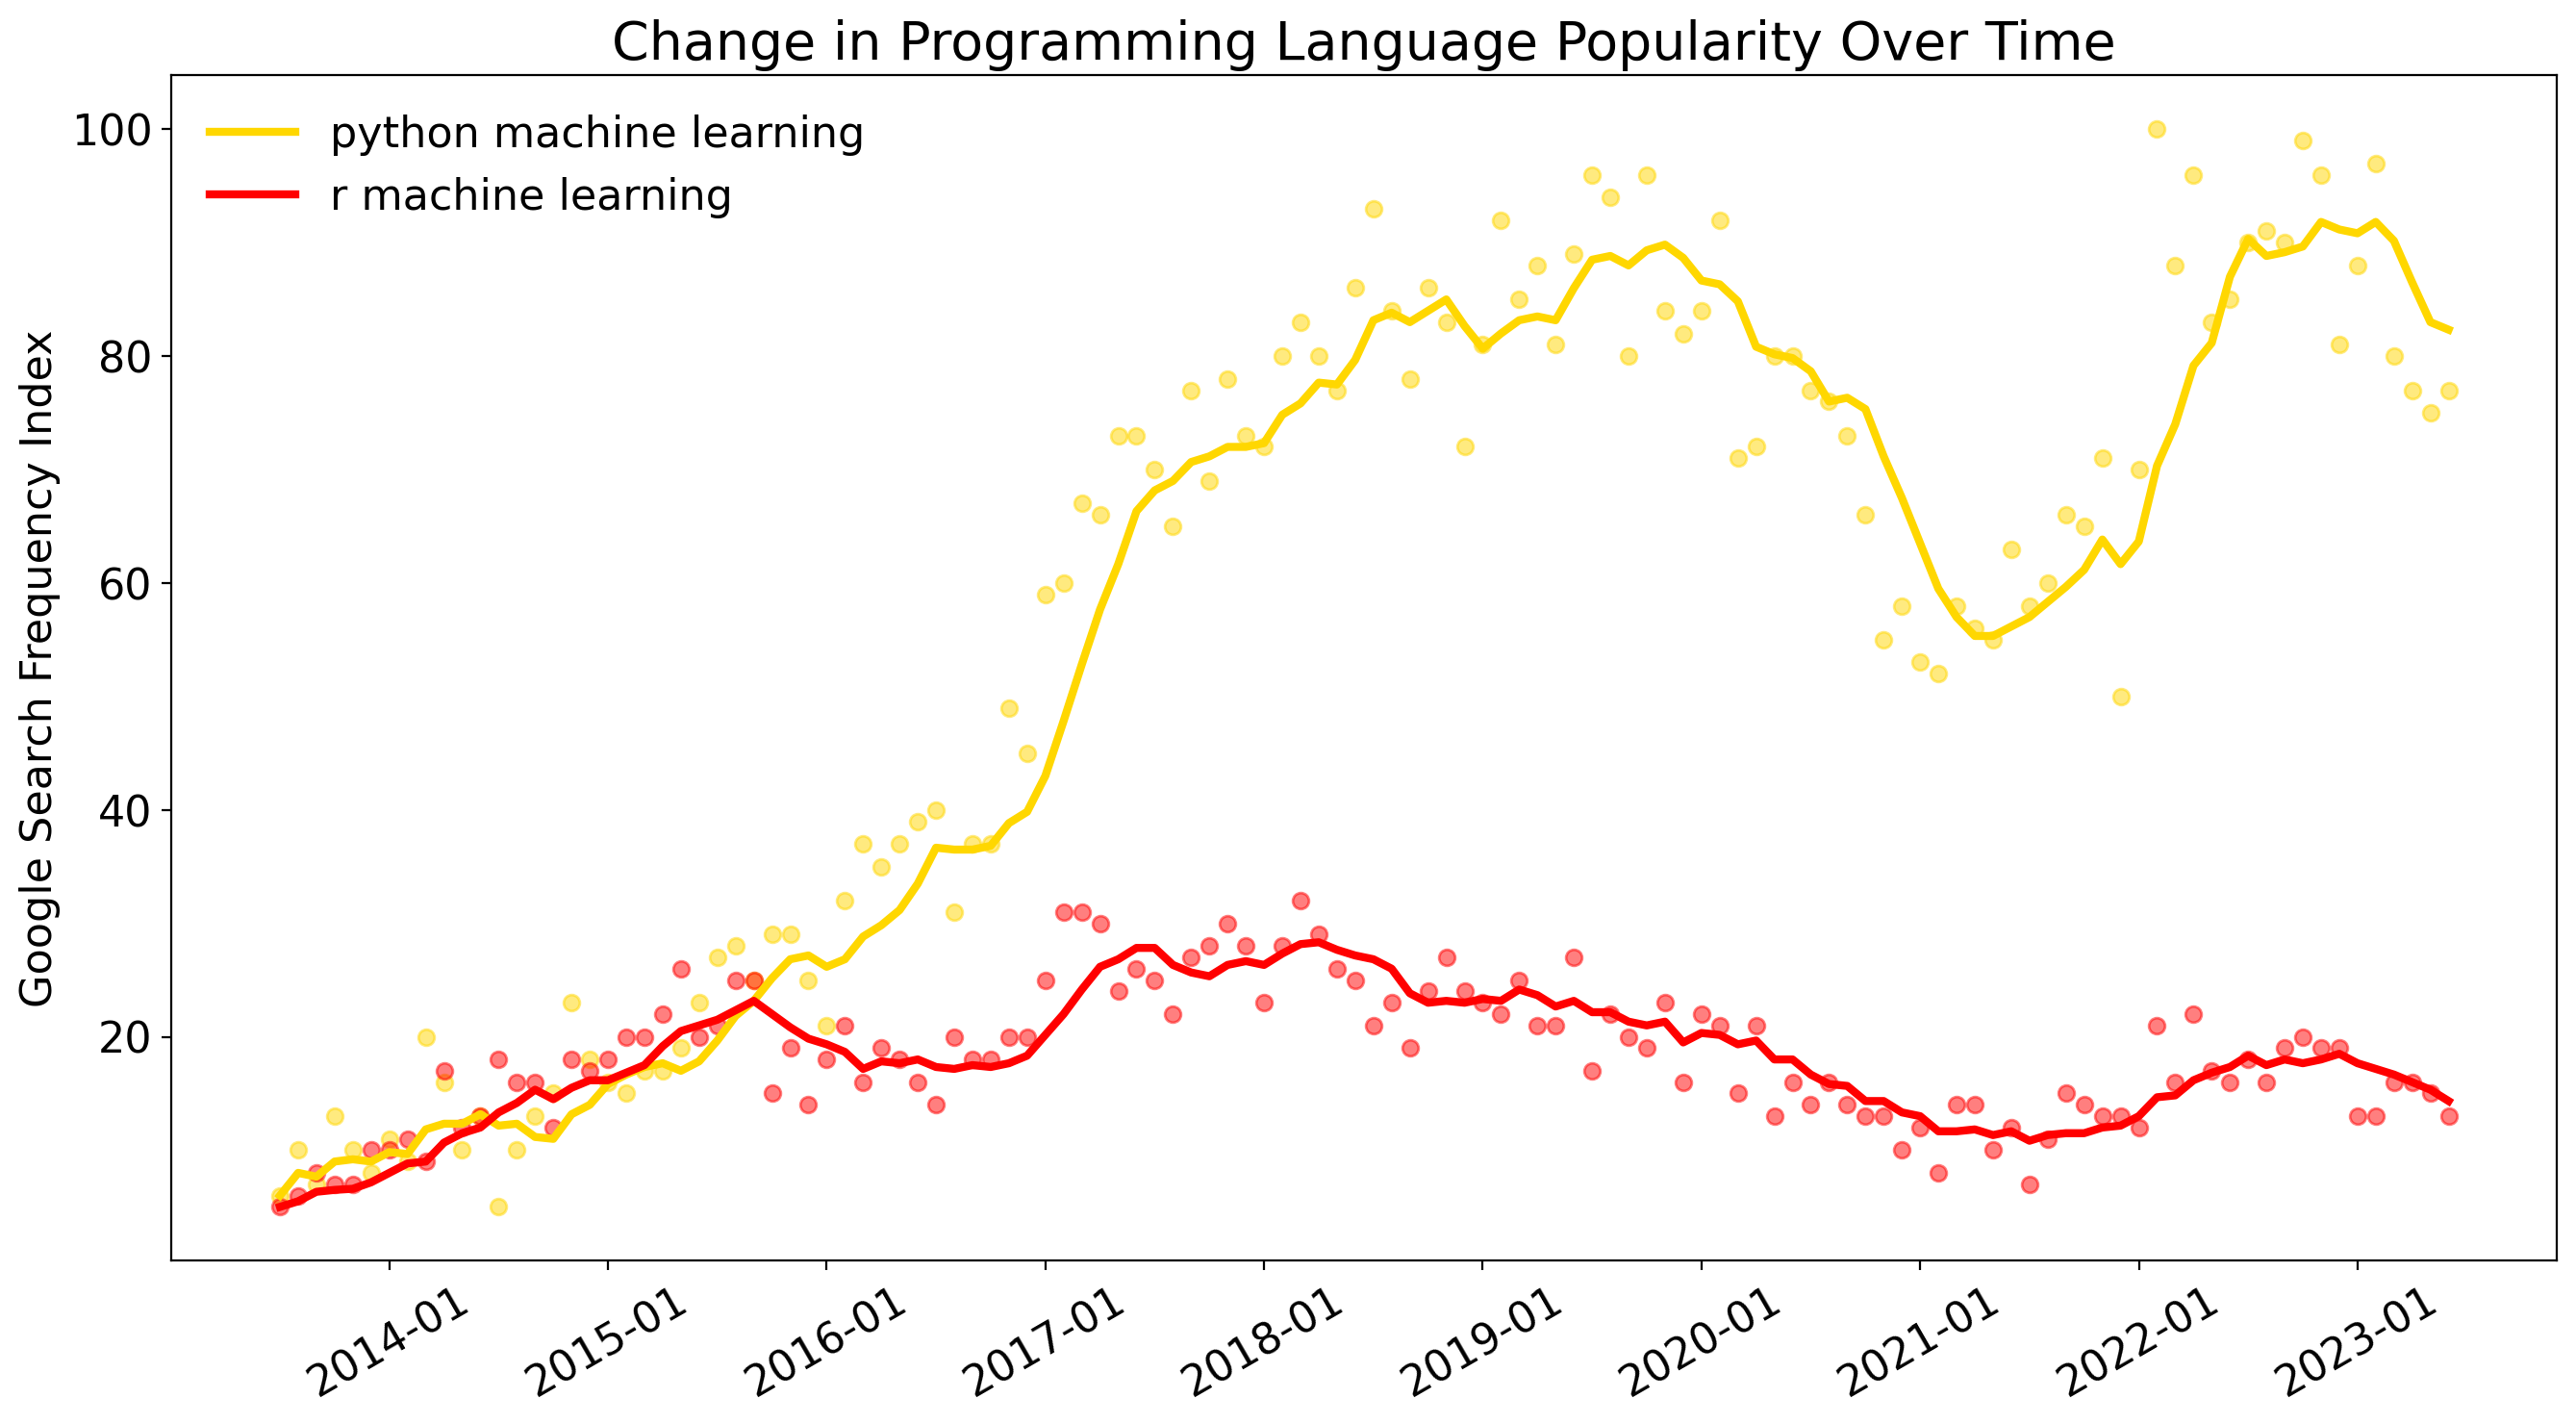

In [197]:
# Import packages
import matplotlib.pyplot as plt

# Format plot
fig = plt.figure(figsize=(16,8), dpi=200)
plt.title('Change in Programming Language Popularity Over Time', fontsize=20)
plt.ylabel('Google Search Frequency Index', fontsize=16)
plt.yticks(fontsize=16)

# Plot moving averages as a line
plt.plot(df_rolling['Month'], df_rolling['python moving average'], c='gold', linewidth=3)
plt.plot(df_rolling['Month'], df_rolling['r moving average'], c='red', linewidth=3)

# Plot monthly observations as a scatter plot
plt.scatter(x=df_rolling['Month'], y=df_rolling['python machine learning'], c='gold', alpha=0.5)
plt.scatter(x=df_rolling['Month'], y=df_rolling['r machine learning'], c='red', alpha=0.5)

# Set the x-axis tick positions, labels, and angle
xticks = df_rolling['Month'][6:][::12]   # skip first 6 labels (to start in January) then select every 12th label thereafter
xtick_labels = [str(i) for i in xticks]
plt.xticks(xticks, xtick_labels, fontsize=16)
plt.xticks(rotation=30)

# Add the legend
plt.legend(['python machine learning', 'r machine learning'], fontsize=16, frameon=False)

# Display plot
plt.show()

In [198]:
# # libraries & dataset
# import matplotlib.pyplot as plt
# import seaborn as sns
#
# # Format plot
# plt.rcParams["figure.figsize"] = 12,8
# plt.title('Distribution of Google Trends by Programming Language')
# plt.xlabel('Google Search Frequency Index')
# plt.ylabel('Density')
# sns.set(font_scale=2)
#
# # plotting both distibutions on the same figure
# sns.kdeplot(df['r machine learning: (United States)'], fill=True, color="b")
# sns.kdeplot(df['python machine learning: (United States)'], fill=True, color="y")
#
# # Display plot
# plt.legend(['r machine learning', 'python machine learning'])
# plt.show()

In [ ]:
# import pandas as pd
#
# # Load data
# df = pd.read_csv('vending_revenue.csv')
# df

In [ ]:
# # libraries & dataset
# import seaborn as sns
# import matplotlib.pyplot as plt
#
# for col in df.columns:
#     try:
#         print(col)
#         # plotting both distibutions on the same figure
#         # col = 'AvgPriceItemSold'
#         fig = sns.kdeplot(df[df['Location']=='Factory'][col], fill=True, color="r")
#         fig = sns.kdeplot(df[df['Location']=='Library'][col], fill=True, color="b")
#         fig = sns.kdeplot(df[df['Location']=='Mall 1'][col], fill=True, color="k")
#         fig = sns.kdeplot(df[df['Location']=='Mall 2'][col], fill=True, color="c")
#         fig = sns.kdeplot(df[df['Location']=='Office'][col], fill=True, color="y")
#         plt.show()
#     except:
#         print(f"{col} did not work")

In [ ]:
# # libraries & dataset
# import seaborn as sns
# import matplotlib.pyplot as plt
#
# # Format plot
# plt.rcParams["figure.figsize"] = 12,8
# plt.title('Share of sales from carbonated beverages')
# sns.set(font_scale=2)
#
# # plotting both distibutions on the same figure
# sns.kdeplot(data=df, x='Category_Carbonated', hue='Location', fill=True)
# plt.show()